In [7]:
import requests

url = "https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta"

file = requests.get(url)
with open("orchid_genes.fasta", "w") as f:
    f.write(file.text)

print("File 'orchid_genes.fasta' downloaded and saved successfully!")

File 'orchid_genes.fasta' downloaded and saved successfully!


In [8]:
!pip install biopython

In [31]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

total_len = 0
count = 0
max_len = 0
min_len = float('inf')
longest_id = ""
shortest_id = ""

print(f"{'ID':<32} | {'Length':<10} | {'GC%':<10}")
print("-" * 54)

for record in SeqIO.parse("orchid_genes.fasta", "fasta"):
    seq_len = len(record.seq)
    gc_val = gc_fraction(record.seq) * 100

    total_len += seq_len
    count += 1

    if seq_len > max_len:
        max_len = seq_len
        longest_id = record.id

    if seq_len < min_len:
        min_len = seq_len
        shortest_id = record.id

    print(f"{record.id:<20} | {seq_len:<10} | {gc_val:.2f}%")

avg_len = total_len / count if count > 0 else 0

print("\n" + "="*54)
print("FINAL GENOMIC DATA REPORT")
print("="*54)
print(f"Total Sequences Analyzed: {count}")
print(f"Average Sequence Length:  {avg_len:.2f} bp")
print(f"Longest Sequence:  {longest_id} ({max_len} bp)")
print(f"Shortest Sequence: {shortest_id} ({min_len} bp)")
print("="*54)

ID                               | Length     | GC%       
------------------------------------------------------
gi|2765658|emb|Z78533.1|CIZ78533 | 740        | 59.59%
gi|2765657|emb|Z78532.1|CCZ78532 | 753        | 48.47%
gi|2765656|emb|Z78531.1|CFZ78531 | 748        | 57.09%
gi|2765655|emb|Z78530.1|CMZ78530 | 744        | 47.58%
gi|2765654|emb|Z78529.1|CLZ78529 | 733        | 47.89%
gi|2765652|emb|Z78527.1|CYZ78527 | 718        | 50.70%
gi|2765651|emb|Z78526.1|CGZ78526 | 730        | 50.41%
gi|2765650|emb|Z78525.1|CAZ78525 | 704        | 50.43%
gi|2765649|emb|Z78524.1|CFZ78524 | 740        | 47.77%
gi|2765648|emb|Z78523.1|CHZ78523 | 709        | 50.35%
gi|2765647|emb|Z78522.1|CMZ78522 | 700        | 49.86%
gi|2765646|emb|Z78521.1|CCZ78521 | 726        | 49.04%
gi|2765645|emb|Z78520.1|CSZ78520 | 753        | 49.54%
gi|2765644|emb|Z78519.1|CPZ78519 | 699        | 49.07%
gi|2765643|emb|Z78518.1|CRZ78518 | 658        | 51.52%
gi|2765642|emb|Z78517.1|CFZ78517 | 752        | 49.73%
gi|276

In [23]:
start_codon_count = 0

for record in SeqIO.parse("orchid_genes.fasta", "fasta"):
    if record.seq.startswith("ATG"):
        start_codon_count += 1

print(f"Total sequences starting with ATG: {start_codon_count} out of {count}")

Total sequences starting with ATG: 0 out of 94


In [33]:
pattern = "ATG"
start_codon_count = 0

for record in SeqIO.parse("orchid_genes.fasta", "fasta"):
    if pattern in record.seq:
        start_codon_count += 1

print(f"Pattern '{pattern}' found in {start_codon_count} out of {count}")

Pattern 'ATG' found in 94 out of 94


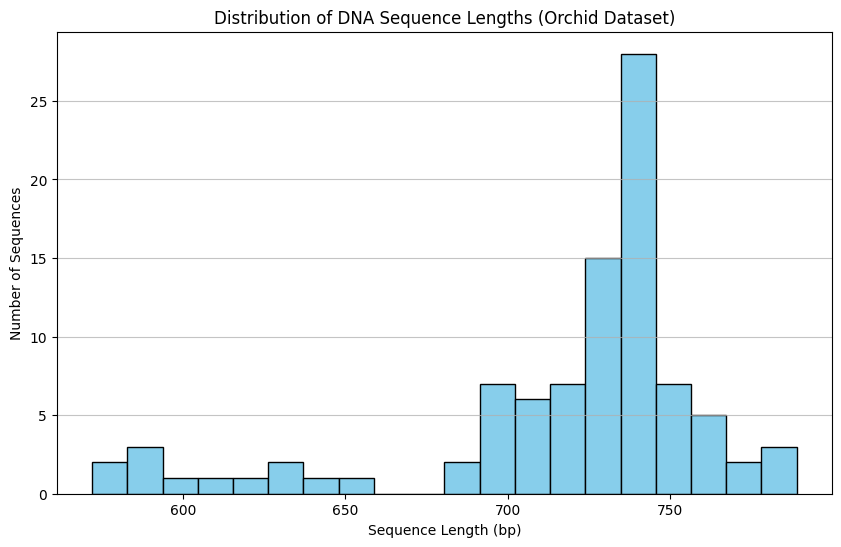

In [12]:
import matplotlib.pyplot as plt

all_lengths = [len(r.seq) for r in SeqIO.parse("orchid_genes.fasta", "fasta")]

plt.figure(figsize=(10, 6))
plt.hist(all_lengths, bins=20, color='skyblue', edgecolor='black')

plt.title("Distribution of DNA Sequence Lengths (Orchid Dataset)")
plt.xlabel("Sequence Length (bp)")
plt.ylabel("Number of Sequences")
plt.grid(axis='y', alpha=0.75)

plt.show()